In [45]:
### JUGANDO CON LA TASA DE APRENDIZAJE Y EL NUMERO DE ITERACIONES CON EL MODELO CONSTRUIDO
### POR AHORA NO SE ALTERO EL ALGORITMO DE IMPLEMENTACION
### SOLO SE CAMBIO LOS PARAMETROS INDICADOS (ALPHA E ITERACIONES)
### SE PROBO CON LO SIGUIENTE:
### ALPHA = 0.00001
### ITERACIONES = 1 000 000
_ALPHA = 0.00001
_ITERACIONES = 1000000
### 
### NOTA: SE MOSTRARÁ AVANCES CADA "5 000" ITERACIONES, ESTO PARA AHORRAR TIEMPO DE PROCESAMIENTO MIENTRAS IMPRIME
### 

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])#---
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])#---
    classes = np.array(test_dataset["list_classes"][:])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))#---
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
#-------------------------------------------------------------------------------------------
def inicializar_zeros(dimension):
    w = np.zeros((dimension, 1),dtype='float')
    b = 0
    assert(w.shape == (dimension,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w ,b
#-------------------------------------------------------------------------------------------
def sigmoide(self):
    return 1 / (1 + np.exp(-self))
#-------------------------------------------------------------------------------------------
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoide(np.dot(w.T, X) + b)
    cost = (-1/m)*np.sum((Y*np.log(A)+ (1-Y)*np.log(1-A)), axis = 1)
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {"dw": dw, "db": db}
    return grads, cost
#-------------------------------------------------------------------------------------------
def optimizar(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 5000 == 0:
            print ("Costo despues de iteracion %i: %f" %(i, cost))
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs
#-------------------------------------------------------------------------------------------
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoide(np.dot(w.T, X)+b)
    for i in range(A.shape[1]):
        if (A[0,i] <= 0.5):
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    assert(Y_prediction.shape == (1, m))
    return Y_prediction
#-------------------------------------------------------------------------------------------
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost =False):
    w, b = inicializar_zeros(X_train.shape[0])
    parameters, grads, costs = optimizar(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs, "Y_prediction_test": Y_prediction_test,
    "Y_prediction_train" : Y_prediction_train, "w" : w, "b" : b,
    "learning_rate" : learning_rate, "num_iterations": num_iterations}
    return d

In [47]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# MOSTRANDO DIMENSIONES
# print("Número de ejemplos de entrenamiento:", train_set_x_orig.shape[0])
# print("Número de ejemplos de validación:", train_set_y.shape[1])
# print("Número de ejemplos de prueba entrada:", test_set_x_orig.shape[0])
# print("Número de ejemplos de prueba salida:", test_set_y.shape[1])
# print("Tamaño de cada imagen:", train_set_x_orig.shape[2])
train_set_x_orig_flatten = train_set_x_orig.reshape (train_set_x_orig.shape [0], -1).T
test_set_x_orig_flatten = test_set_x_orig.reshape (test_set_x_orig.shape [0], -1).T
### Estandarizando conjunto de datos
train_set_x = train_set_x_orig_flatten/255
test_set_x = test_set_x_orig_flatten/255

In [48]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, _ITERACIONES, _ALPHA ,print_cost = True)

Costo despues de iteracion 0: 0.693147
Costo despues de iteracion 5000: 0.616034
Costo despues de iteracion 10000: 0.591344
Costo despues de iteracion 15000: 0.572051
Costo despues de iteracion 20000: 0.555840
Costo despues de iteracion 25000: 0.541680
Costo despues de iteracion 30000: 0.529015
Costo despues de iteracion 35000: 0.517503
Costo despues de iteracion 40000: 0.506916
Costo despues de iteracion 45000: 0.497092
Costo despues de iteracion 50000: 0.487911
Costo despues de iteracion 55000: 0.479284
Costo despues de iteracion 60000: 0.471138
Costo despues de iteracion 65000: 0.463416
Costo despues de iteracion 70000: 0.456074
Costo despues de iteracion 75000: 0.449071
Costo despues de iteracion 80000: 0.442377
Costo despues de iteracion 85000: 0.435963
Costo despues de iteracion 90000: 0.429807
Costo despues de iteracion 95000: 0.423888
Costo despues de iteracion 100000: 0.418188
Costo despues de iteracion 105000: 0.412692
Costo despues de iteracion 110000: 0.407385
Costo despues

Costo despues de iteracion 935000: 0.142900
Costo despues de iteracion 940000: 0.142340
Costo despues de iteracion 945000: 0.141785
Costo despues de iteracion 950000: 0.141234
Costo despues de iteracion 955000: 0.140687
Costo despues de iteracion 960000: 0.140145
Costo despues de iteracion 965000: 0.139606
Costo despues de iteracion 970000: 0.139071
Costo despues de iteracion 975000: 0.138540
Costo despues de iteracion 980000: 0.138013
Costo despues de iteracion 985000: 0.137490
Costo despues de iteracion 990000: 0.136970
Costo despues de iteracion 995000: 0.136455
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


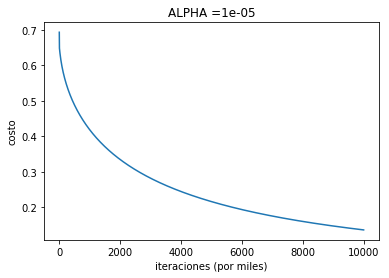

In [49]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('costo')
plt.xlabel('iteraciones (por miles)')
plt.title("ALPHA =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %
learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



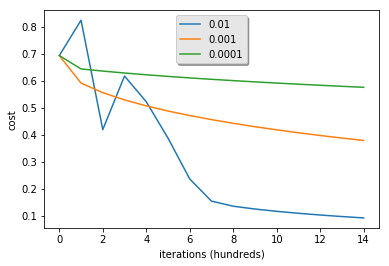

In [50]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500,
learning_rate = i, print_cost = False)
print ('\n' + "-------------------------------------------------------" + '\n')
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 0.0, prediccion de algoritmo = "non-cat" imagen


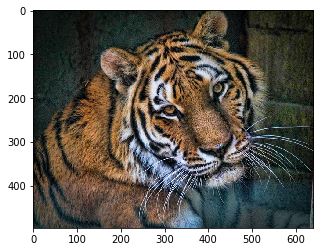

In [43]:
### probar con tu imagen
my_image = "tigre1.jpg"
fname = "prueba_gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
#image = np.array(Image.fromarray(fname).resize(), flatten=False)
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", prediccion de algoritmo = \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" imagen")

C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
C:\Users\Toshiba\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


y = 1.0, prediccion de algoritmo = "cat" imagen


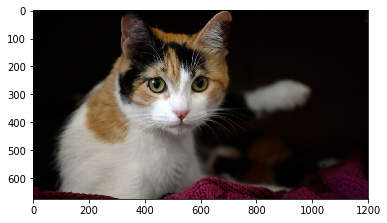

In [52]:
### probar con tu imagen
my_image = "gato2.jpg"
fname = "prueba_gatos/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
#image = np.array(Image.fromarray(fname).resize(), flatten=False)
num_px = train_set_x_orig.shape[2]
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T

my_predicted_image = predict(d["w"], d["b"], my_image)
plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", prediccion de algoritmo = \"" +
classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") + "\" imagen")